In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_excel("../data/PM_ML_Data_Final.xlsx",index_col="TestID")

In [3]:
df.head()

,WNRD,WNVol,WNNCD,Class
TestID,,,,
1,0.000120,0.012339,0.008525,Similar
2,0.000120,0.011953,0.008375,Similar
3,0.000196,0.007618,0.004438,Similar
4,0.000197,0.007452,0.004424,Similar
5,0.000162,0.012785,0.009120,Similar


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
seed=7

In [7]:
X=df.drop("Class",axis=1)

In [8]:
y=df["Class"]

In [9]:
X

,WNRD,WNVol,WNNCD
TestID,,,
1,0.000120,0.012339,0.008525
2,0.000120,0.011953,0.008375
3,0.000196,0.007618,0.004438
4,0.000197,0.007452,0.004424
5,0.000162,0.012785,0.009120
...,...,...,...
962,0.091940,0.124211,0.153080
963,0.082274,0.117211,0.140817
964,0.091940,0.124431,0.153347


In [10]:
y

TestID
1        Similar
2        Similar
3        Similar
4        Similar
5        Similar
         ...    
962    Different
963    Different
964    Different
965    Different
966    Different
Name: Class, Length: 966, dtype: object

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=seed)

## MLP 모델

### 최적화

### 1. sgd

In [13]:
from sklearn.neural_network import MLPClassifier

In [22]:
mlp=MLPClassifier(hidden_layer_sizes=[10],solver='sgd',learning_rate_init=0.01,max_iter=1000)

In [23]:
mlp.fit(X_train,y_train)

C:\Users\jksuh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=[10], learning_rate_init=0.01, max_iter=1000,
              solver='sgd')

In [24]:
print(mlp.score(X_train,y_train))

0.8357988165680473


In [25]:
mlp2=MLPClassifier(hidden_layer_sizes=[10,10],solver='sgd',learning_rate_init=0.01,max_iter=1000)

In [26]:
mlp2.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=[10, 10], learning_rate_init=0.01,
              max_iter=1000, solver='sgd')

In [27]:
print(mlp2.score(X_train,y_train))

0.8446745562130178


## 2.adam

In [28]:
mlp=MLPClassifier(hidden_layer_sizes=[10],solver='adam',learning_rate_init=0.01,max_iter=1000)

In [29]:
mlp.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=[10], learning_rate_init=0.01, max_iter=1000)

In [31]:
print(mlp.score(X_train,y_train))

0.856508875739645


In [32]:
ml2p=MLPClassifier(hidden_layer_sizes=[10,10],solver='adam',learning_rate_init=0.01,max_iter=1000)

In [33]:
mlp2.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=[10, 10], learning_rate_init=0.01,
              max_iter=1000, solver='sgd')

In [34]:
print(mlp2.score(X_train,y_train))

0.849112426035503


## 3.lbfgs

In [35]:
mlp=MLPClassifier(hidden_layer_sizes=[10],solver='lbfgs',learning_rate_init=0.01,max_iter=1000)

In [36]:
mlp.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=[10], learning_rate_init=0.01, max_iter=1000,
              solver='lbfgs')

In [37]:
print(mlp.score(X_train,y_train))

0.9127218934911243


In [38]:
mlp2=MLPClassifier(hidden_layer_sizes=[10,10],solver='lbfgs',learning_rate_init=0.01,max_iter=1000)

In [39]:
mlp2.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=[10, 10], learning_rate_init=0.01,
              max_iter=1000, solver='lbfgs')

In [40]:
print(mlp2.score(X_train,y_train))

0.9319526627218935


## Controlling hidden layers

### size of hidden layer

<ipython-input-43-d653d2fd7d08>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sizes=np.linspace(5,100,20,dtype=np.int)
C:\Users\jksuh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jksuh\ana

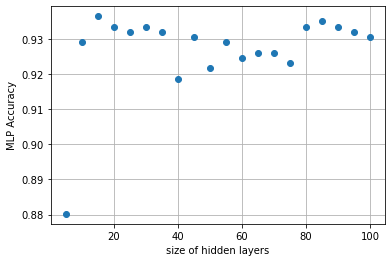

In [43]:
sizes=np.linspace(5,100,20,dtype=np.int)
scores=[]

for size in sizes:
    mlp=MLPClassifier(solver='lbfgs',hidden_layer_sizes=[size])
    mlp.fit(X_train,y_train)
    scores.append(mlp.score(X_train,y_train))

line=plt.figure()
plt.plot(sizes,scores,"o")
plt.xlabel("size of hidden layers")
plt.ylabel("MLP Accuracy")
plt.grid(True)
plt.show()

### Number of hidden layers

C:\Users\jksuh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jksuh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jksuh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

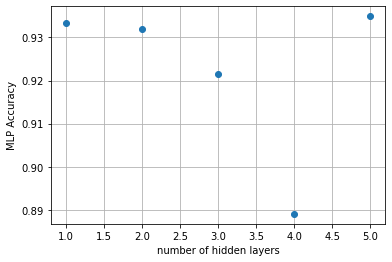

In [47]:
numbers=range(1,6)
scores=[]

for num in numbers:
    mlp=MLPClassifier(solver='lbfgs',hidden_layer_sizes=tuple([15]*num))
    mlp.fit(X_train,y_train)
    scores.append(mlp.score(X_train,y_train))

line=plt.figure()
plt.plot(numbers,scores,"o")
plt.xlabel("number of hidden layers")
plt.ylabel("MLP Accuracy")
plt.grid(True)
plt.show()

### alpha value=regluarization

C:\Users\jksuh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jksuh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\jksuh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

{1e-05: 0.8831360946745562, 7.742636826811278e-05: 0.9289940828402367, 0.0005994842503189409: 0.9260355029585798, 0.004641588833612777: 0.9289940828402367, 0.03593813663804626: 0.9127218934911243, 0.2782559402207126: 0.8446745562130178, 2.154434690031882: 0.8328402366863905, 16.681005372000556: 0.8357988165680473, 129.15496650148827: 0.3165680473372781, 1000.0: 0.3165680473372781}


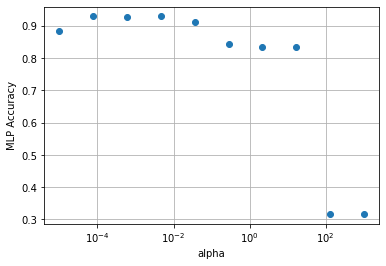

In [50]:
classifiers=[]

for a in np.logspace(-5,3,10):
    classifiers.append(MLPClassifier(solver='lbfgs',hidden_layer_sizes=(30),alpha=a))
    
scores={}
for clf in classifiers:
    clf.fit(X_train,y_train)
    scores[clf.alpha]=(clf.score(X_train,y_train))
    
print(scores) 

line=plt.figure()
plt.plot(list(scores.keys()),list(scores.values()),"o")
plt.semilogx()
plt.xlabel("alpha")
plt.ylabel("MLP Accuracy")
plt.grid(True)
plt.show()

In [52]:
mlp=MLPClassifier(hidden_layer_sizes=[15,15,15,15,15],solver='lbfgs',learning_rate_init=0.01,max_iter=1000)
mlp.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=[15, 15, 15, 15, 15], learning_rate_init=0.01,
              max_iter=1000, solver='lbfgs')

In [53]:
print(mlp.score(X_train,y_train))

0.9142011834319527


In [55]:
predictions=mlp.predict(X_test)

In [56]:
from sklearn.metrics import classification_report, confusion_matrix

In [57]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         Day       0.76      0.63      0.69        35
   Different       1.00      1.00      1.00        80
  Instrument       0.99      0.97      0.98        92
         Lab       0.86      0.92      0.89        13
     Similar       0.82      0.90      0.86        70

    accuracy                           0.92       290
   macro avg       0.88      0.88      0.88       290
weighted avg       0.92      0.92      0.92       290



In [58]:
print(confusion_matrix(y_test,predictions))

[[22  0  0  0 13]
 [ 0 80  0  0  0]
 [ 0  0 89  2  1]
 [ 0  0  1 12  0]
 [ 7  0  0  0 63]]


In [59]:
print(mlp.score(X_test,y_test))

0.9172413793103448


In [60]:
un=pd.read_excel("../data/PM_ML_Unknown.xlsx",index_col='TestID')

In [61]:
un

,WNRD,WNVol,WNNCD
TestID,,,
14,0.000206,0.019164,0.012985
70,0.000307,0.008519,0.009125
176,0.192594,0.087238,0.208814
295,0.199662,0.149283,0.246484
382,0.001103,0.047906,0.036669
419,0.002454,0.099070,0.057033
425,0.006560,0.139213,0.094563
723,0.006616,0.149104,0.099622
731,0.000245,0.024575,0.018870


In [62]:
un_prediction=mlp.predict(un)

In [63]:
un_prediction

array(['Similar', 'Similar', 'Different', 'Different', 'Lab', 'Lab',
       'Instrument', 'Instrument', 'Day', 'Similar'], dtype='<U10')

In [64]:
un["Prediction"]=un_prediction[:]

In [65]:
un

,WNRD,WNVol,WNNCD,Prediction
TestID,,,,
14,0.000206,0.019164,0.012985,Similar
70,0.000307,0.008519,0.009125,Similar
176,0.192594,0.087238,0.208814,Different
295,0.199662,0.149283,0.246484,Different
382,0.001103,0.047906,0.036669,Lab
419,0.002454,0.099070,0.057033,Lab
425,0.006560,0.139213,0.094563,Instrument
723,0.006616,0.149104,0.099622,Instrument
731,0.000245,0.024575,0.018870,Day
